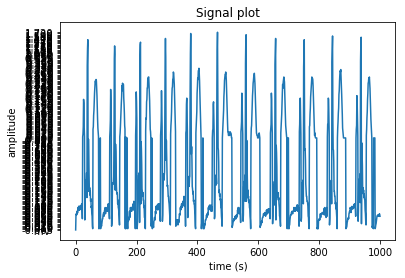

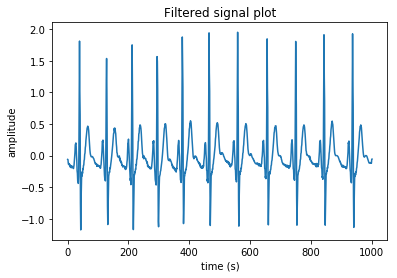

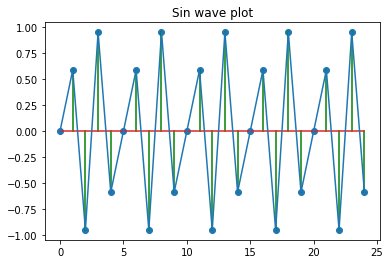

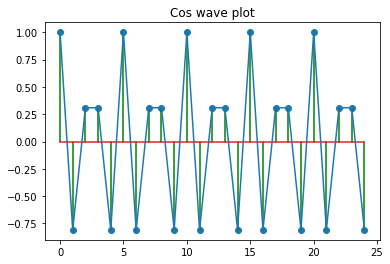

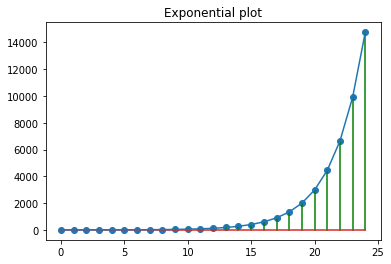

In [ ]:
import sys
import numpy as np
import pyaudio
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from PyQt5 import QtCore, QtGui, QtWidgets
from Task2 import Ui_MainWindow


class MyForm(QtWidgets.QMainWindow):

    def __init__(self, parent=None):
        QtWidgets.QMainWindow.__init__(self,parent)
        self.ui = Ui_MainWindow()
        self.ui.setupUi(self)

        self.ui.pushButton.clicked.connect(self.on_browse_clicked)
        self.ui.pushButton_2.clicked.connect(self.on_filter_clicked)
        self.ui.pushButton_4.clicked.connect(self.on_generate_clicked)
        self.ui.pushButton_5.clicked.connect(self.on_egenerate_clicked)
        self.ui.pushButton_6.clicked.connect(self.on_sin_clicked)
        self.ui.pushButton_7.clicked.connect(self.on_cos_clicked)
        self.ui.pushButton_8.clicked.connect(self.on_exp_clicked)


    def on_browse_clicked(self):
        try:

            global filename

            filename = QtWidgets.QFileDialog.getOpenFileName(self, 'Single File', QtCore.QDir.rootPath(),
                                                             '*.csv')

            f1 = filename[0]
            sig = pd.read_csv(f1)
            sig1 = np.array(sig).transpose()

            plt.clf()
            plt.title('Signal plot')
            plt.plot(sig1[:][1])
            plt.xlabel('time (s)')
            plt.ylabel('amplitude')
            plt.show()

        except ValueError:
            self.ui.label_8.setText('Error')


    def plot(t, y):
        fig = plt.figure()
        ax = fig.gca()
        ax.set_ylim((-2, 2))
        ax.grid(True)

        plt.plot(t, y)



    def stem(t, y1):
        markerline, stemlines, baseline = plt.stem(t, y1, markerfmt='o', label='y2')
        plt.setp(stemlines, 'color', plt.getp(markerline, 'color'))
        plt.setp(stemlines, 'linestyle', 'dotted')

        plt.legend()
        plt.show()



    def on_sin_clicked(self):
        try:
            fs = float(self.ui.lineEdit_9.text())  # sample rate
            f = float(self.ui.lineEdit_8.text())  # the frequency of the signal

            x = np.arange(fs)  # the points on the x axis for plotting
            # compute the value (amplitude) of the sin wave at the for each sample
            y = [np.sin(2 * np.pi * f * (i / fs)) for i in x]

            # this instruction can only be used with IPython Notbook.
            # get_ipython().magic('matplotlib inline')
            # showing the exact location of the smaples

            plt.clf()
            plt.title('Sin wave plot')
            plt.stem(x, y, 'g')
            plt.plot(x, y)
            plt.show()
        except ValueError:
            self.ui.label_8.setText('Error')


    def on_cos_clicked(self):
        try:
            fs = float(self.ui.lineEdit_9.text())  # sample rate
            f = float(self.ui.lineEdit_8.text())  # the frequency of the signal

            x = np.arange(fs)  # the points on the x axis for plotting
            # compute the value (amplitude) of the sin wave at the for each sample
            y = [np.cos(2 * np.pi * f * (i / fs)) for i in x]

            # this instruction can only be used with IPython Notbook.
            # get_ipython().magic('matplotlib inline')
            # showing the exact location of the smaples

            plt.clf()
            plt.title('Cos wave plot')
            plt.stem(x, y, 'g')
            plt.plot(x, y)
            plt.show()

        except ValueError:
            self.ui.label_8.setText('Error')

    def on_exp_clicked(self):
        try:
            fs = float(self.ui.lineEdit_9.text())  # sample rate
            f = float(self.ui.lineEdit_8.text())  # the frequency of the signal

            x = np.arange(fs)  # the points on the x axis for plotting
            # compute the value (amplitude) of the sin wave at the for each sample
            y = [np.exp(f * (i / fs)) for i in x]

            # this instruction can only be used with IPython Notbook.
            # get_ipython().magic('matplotlib inline')
            # showing the exact location of the smaples

            plt.clf()
            plt.title('Exponential plot')
            plt.stem(x, y, 'g')
            plt.plot(x, y)
            plt.show()

        except ValueError:
            self.ui.label_8.setText('Error')


    def on_generate_clicked(self):
        try:

            p = pyaudio.PyAudio()

            volume = 0.5  # range [0.0, 1.0]
            fs = 44100  # sampling rate, Hz, must be integer

            f1 = self.ui.lineEdit.text()  # sine frequency, Hz, may be float
            f2 = self.ui.lineEdit_2.text()
            f1_ = float(f1)
            f2_ = float(f2)
            time = self.ui.lineEdit_3.text()
            duration = float(time)

            if f1_ <20 or f1_ >20000:
                self.ui.label_8.setText("Frequency value should be between 20Hz and 20KHz")
                return

            if f2_ <20 or f2_ >20000:
                self.ui.label_8.setText("Frequency value should be between 20Hz and 20KHz")
                return

            if duration > 300:
                self.ui.label_8.setText("Error! Very long duration")
                return

            # generate samples, note conversion to float32 array
            samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f1_ / fs) + (
                np.sin(2 * np.pi * np.arange(fs * duration) * f2_ / fs))).astype(np.float32)

            # for paFloat32 sample values must be in range [-1.0, 1.0]
            stream = p.open(format=pyaudio.paFloat32,
                            channels=1,
                            rate=fs,
                            output=True)

            # play. May repeat with different volume values (if done interactively)
            stream.write(volume * samples)

            stream.stop_stream()
            stream.close()

            p.terminate()

        except ValueError:
            self.ui.label_8.setText('Error')

    def on_egenerate_clicked(self):
        try:
            p = pyaudio.PyAudio()

            volume = 0.5  # range [0.0, 1.0]
            fs = 44100  # sampling rate, Hz, must be integer

            f1 = self.ui.lineEdit.text()  # sine frequency, Hz, may be float
            f2 = self.ui.lineEdit_2.text()
            expo = self.ui.lineEdit_4.text()
            expo_ = float(expo)
            f1_ = float(f1)
            f2_ = float(f2)
            time = self.ui.lineEdit_3.text()
            duration = float(time)

            if f1_ < 20 or f1_ > 20000:
                self.ui.label_8.setText("Frequency value should be between 20Hz and 20KHz")
                return

            if f2_ < 20 or f2_ > 20000:
                self.ui.label_8.setText("Frequency value should be between 20Hz and 20KHz")
                return

            if duration > 300:
                self.ui.label_8.setText("Error! Very long duration")
                return
            # generate samples, note conversion to float32 array
            samples = (np.sin(2 * np.pi * np.arange(fs * duration) * f1_ / fs) + (
                np.sin(2 * np.pi * np.arange(fs * duration) * f2_ / fs))+ np.exp(np.arange(fs * duration) * expo_ / fs)).astype(np.float32)

            # for paFloat32 sample values must be in range [-1.0, 1.0]
            stream = p.open(format=pyaudio.paFloat32,
                            channels=1,
                            rate=fs,
                            output=True)

            # play. May repeat with different volume values (if done interactively)
            stream.write(volume * samples)

            stream.stop_stream()
            stream.close()

            p.terminate()

        except ValueError:
            self.ui.label_8.setText('Error')

    def on_filter_clicked(self):
        try:
            global filename

            f1 = filename[0]
            sig = pd.read_csv(f1)
            sig1 = np.array(sig).transpose()
            sig1_f = sig1[1][1:].astype(np.float)

            #get parameters
            par1 = self.ui.lineEdit_5.text()
            par2 = self.ui.lineEdit_6.text()
            par3 = self.ui.lineEdit_7.text()
            filter_par = [float(par1),float(par2),float(par3)]

            #filter equation
            filtered_signal = signal.convolve(sig1_f,filter_par)

            #plot filtered signal
            plt.clf()
            plt.title('Filtered signal plot')
            plt.plot(filtered_signal)
            plt.xlabel('time (s)')
            plt.ylabel('amplitude')
            plt.show()

        except ValueError:
            self.ui.label_8.setText('Error')


if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    window = MyForm()
    window.show()
    sys.exit(app.exec_())